# Задание 1

In [2]:
import pandas as pd

df = pd.read_csv(r'materials\hw_6\Electronic_sales_Sep2023-Sep2024.csv', encoding='utf8', delimiter=',')

In [40]:
prefer_payment_method = df.groupby('Customer ID')['Payment Method'].max()
total_price = df.groupby('Customer ID')['Total Price'].sum()
addon_total = df.groupby('Customer ID')['Add-on Total'].sum()

# Задание 2

 1.На основании датасета получите доход:
 - по каждому методу доставки
 - по каждому типу продукта
 - по дополнительным услугам за каждый месяц
 - по дополнительным услугам за каждый квартал.
 
 2.Отобразите полученные данные на графике.

In [3]:
df.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [161]:
from datetime import datetime as dt
from datetime import timedelta as timedelta
from matplotlib import pyplot as plt

def get_month(row, mode='month'):
    purchase_date = dt.strptime(row['Purchase Date'], '%Y-%m-%d')
    purchase_date = purchase_date.replace(day=1)

    if mode == 'month':
        return purchase_date.strftime('%Y-%m-%d')
    elif mode =='quarter':
        month = purchase_date.month
        month_of_quarter = ((month-1)//3+1)*3-2
        purchase_date = purchase_date.replace(month=month_of_quarter)

    return purchase_date.strftime('%Y-%m-%d')

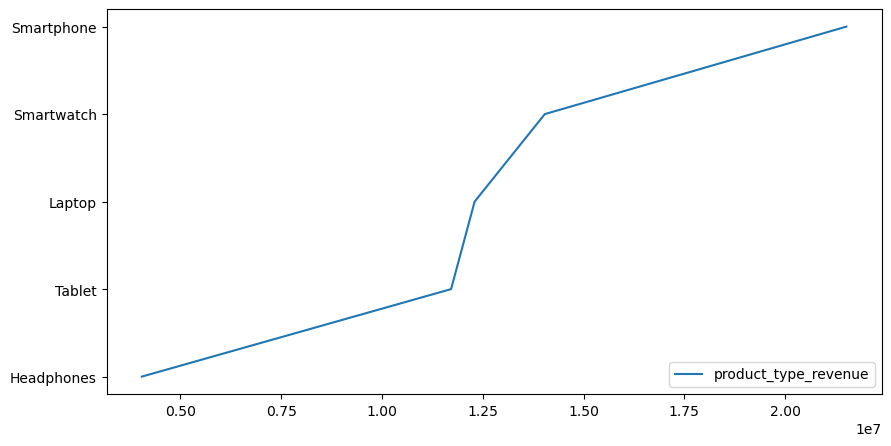

In [165]:
df['purchase_month'] = df.apply(get_month, axis=1)
df['purchase_quarter'] = df.apply(get_month, mode='quarter', axis=1)

product_type_revenue = df.groupby('Product Type').agg({'Total Price': 'sum'}).reset_index()
product_type_revenue.sort_values('Total Price', inplace=True)

fig, ax = plt.subplots(figsize=(10,5))

plt.grid = True
ax.plot(
    product_type_revenue['Total Price'],
    product_type_revenue['Product Type'],
    label='product_type_revenue'
)

ax.legend(loc='lower right')


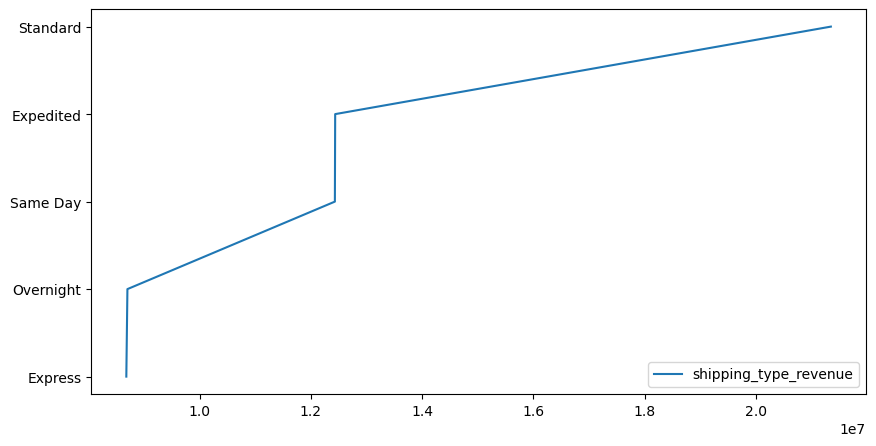

In [168]:
shipping_type_revenue = df.groupby('Shipping Type').agg({'Total Price': 'sum'}).reset_index()
shipping_type_revenue.sort_values('Total Price', inplace=True)

fig, ax = plt.subplots(figsize=(10,5))

plt.grid = True
ax.plot(
    shipping_type_revenue['Total Price'],
    shipping_type_revenue['Shipping Type'],
    label='shipping_type_revenue'
)

ax.legend(loc='lower right')

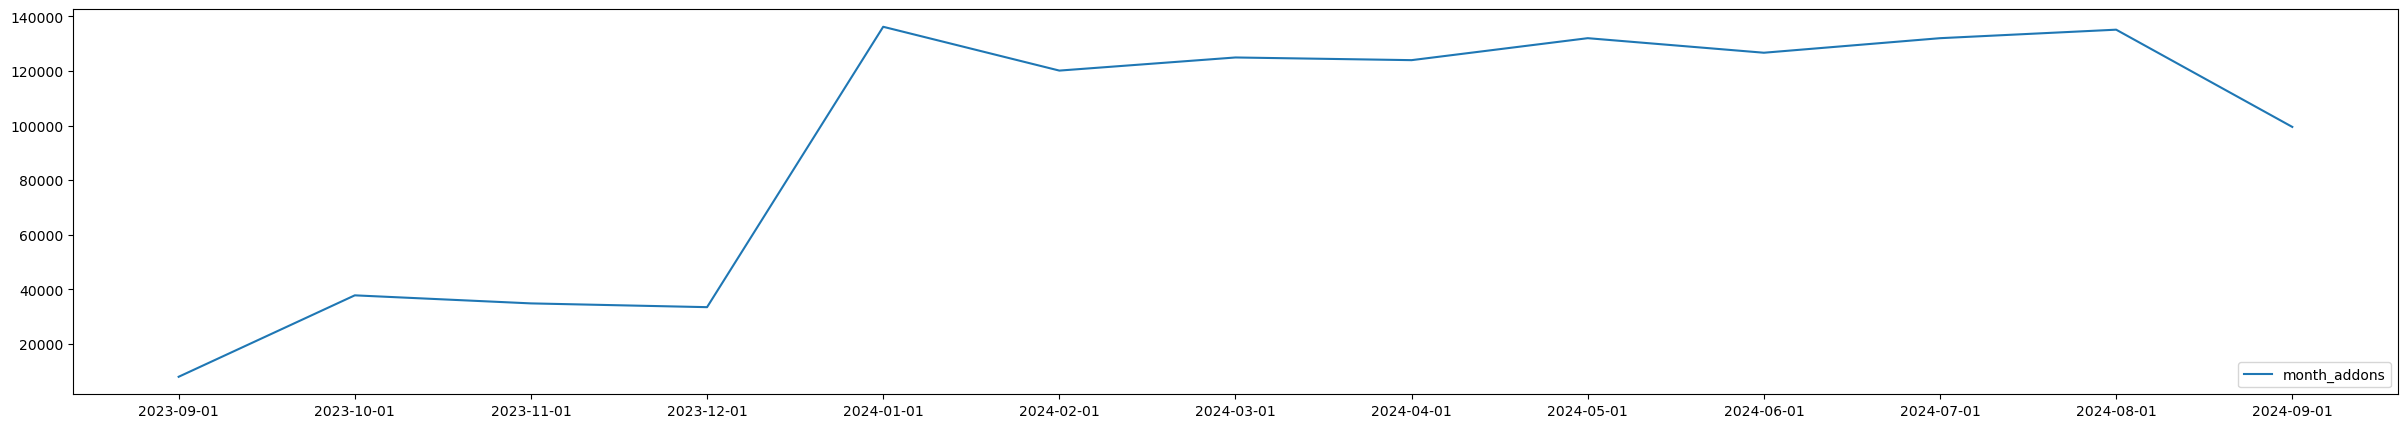

In [177]:
month_addons = df.groupby('purchase_month').agg({'Add-on Total': 'sum'}).reset_index().sort_values('purchase_month')
quarter_addons = df.groupby('purchase_quarter').agg({'Add-on Total': 'sum'}).reset_index().sort_values('purchase_quarter')

fig, ax = plt.subplots(figsize=(30,5))

plt.grid = True
ax.plot(
    month_addons['purchase_month'],
    month_addons['Add-on Total'],
    label='month_addons'
)

ax.legend(loc='lower right')

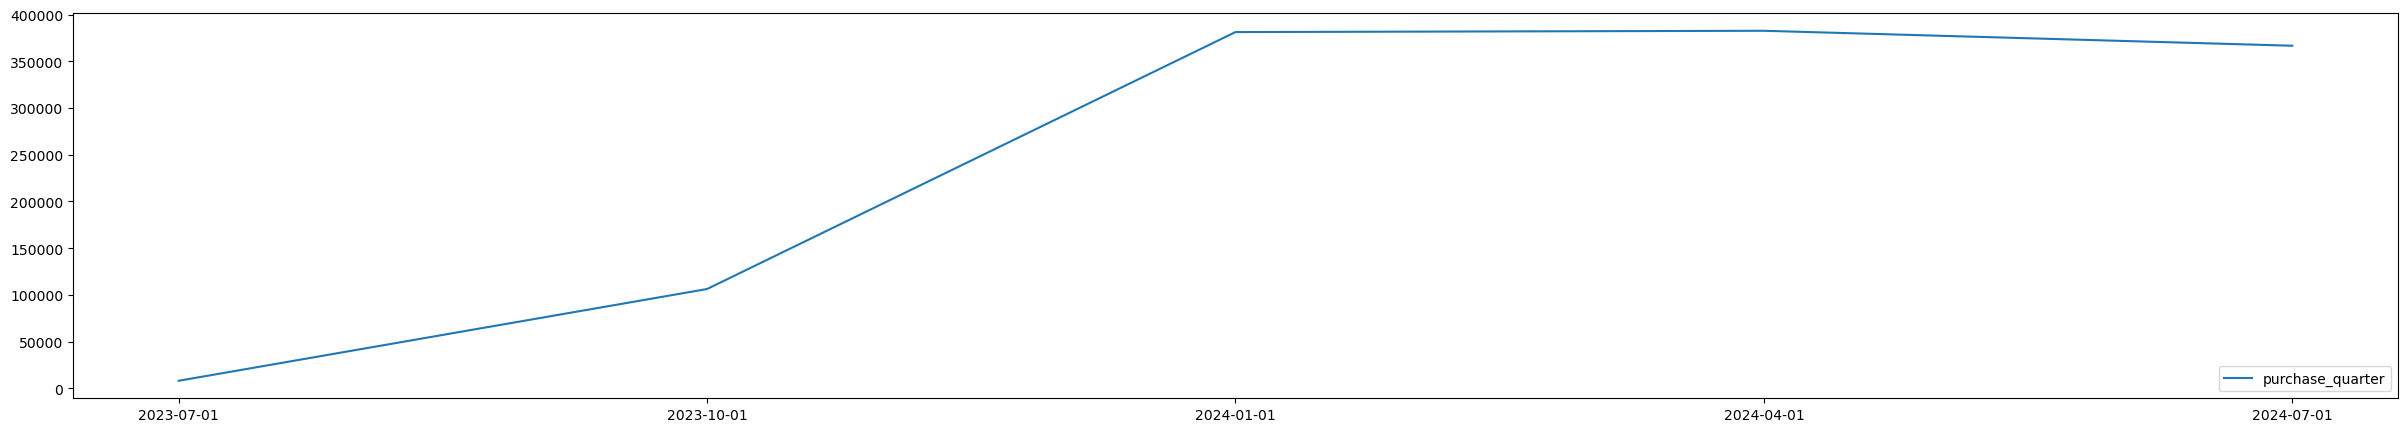

In [178]:
quarter_addons = df.groupby('purchase_quarter').agg({'Add-on Total': 'sum'}).reset_index().sort_values('purchase_quarter')

fig, ax = plt.subplots(figsize=(30,5))

ax.plot(
    quarter_addons['purchase_quarter'],
    quarter_addons['Add-on Total'],
    label='purchase_quarter'
)

ax.legend(loc='lower right')